<a href="https://colab.research.google.com/github/cjakuc/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












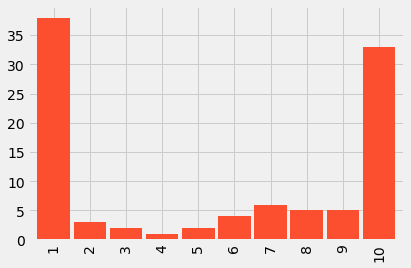

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1',width = 0.9);

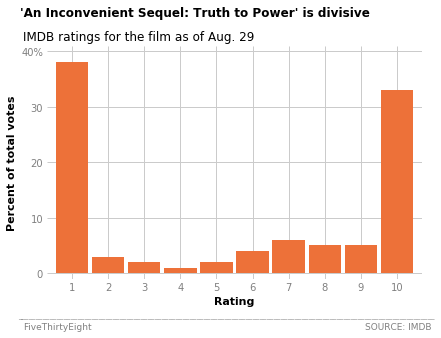

In [260]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
# Set stylesheet
plt.style.use('fivethirtyeight') # Set style

# Figure / axes syntax
fig, ax = plt.subplots()

# Add the gray bar
# ax.hlines(xmin=-4,xmax=10,y=-8,color='gray')
# ax.axhline(xmin=-20,xmax=10,y=-7.5,color='gray')

# Hack the gray bar
ax.text(s='_______________________________________________________________________________________________________________________',
        color='gray',fontsize=7,x=-1.5,y=-8)

# Plot the bars
fake.plot.bar(width=.9,color='#ED7139')

# Title
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive",
             loc='left',
             c='black',
             fontsize=12,fontweight='bold',
             x=-.07,
             y=1.1)

# Subtitle
ax.text(s='IMDB ratings for the film as of Aug. 29',
        y=42,x=-1.35,
        c='black',
        fontsize=12)

# X Label
ax.set_xlabel('Rating',
              c='black',
              fontweight='bold',
              fontsize=11)

# Y Label
ax.set_ylabel('Percent of total votes',
              c='black',
              fontweight='bold',
              fontsize=11)

# X Axis Tick Labels
ax.set_xticklabels(range(1,11,1),
                   c='grey',
                   rotation='horizontal',
                   fontsize=10)

# Y Axis Tick Labels
ax.set_yticklabels(['0','10','20','30',"40%"],
                   c='grey',
                   rotation='horizontal',
                   fontsize=10)
# Set Y ticks
ax.set_yticks(ticks=range(0,50,10))

# Set figure background color
fig.set_facecolor(color='white')

# Set axes background color
ax.set_facecolor(color='white')

# FiveThirtyEight Footer
ax.text(s='FiveThirtyEight',
        y=-10,x=-1.35,
        c='grey',
        fontsize=9)

# Source Footer
ax.text(s='SOURCE: IMDB',
        y=-10,x=8.1,
        c='grey',
        fontsize=9)

# Frame off
ax.spines['bottom'].set_color(None)
ax.spines['top'].set_color(None)
ax.spines['left'].set_color(None)
ax.spines['right'].set_color(None)

# Extend the grid
plt.ylim(-1,41)
# ax.tick_params(which='both', length=10,color='grey')
# ax.tick_params(top=True, length=2,color='grey')
# ax.tick_params(bottom=True, length=8,color='grey')

# Save the figure
plt.savefig('Explanatory Visualizations Assignment.png')

# Part 2

Source: https://fivethirtyeight.com/features/how-qi-and-za-changed-scrabble/

Graph:https://fivethirtyeight.com/wp-content/uploads/2017/04/roeder-scrabble-1.png?w=1150

In [0]:
url = 'https://github.com/fivethirtyeight/data/blob/master/scrabble-games/scrabble_games.csv?raw=true'
df = pd.read_csv(url)

In [67]:
df.head()

,gameid,tourneyid,tie,winnerid,winnername,winnerscore,winneroldrating,winnernewrating,winnerpos,loserid,losername,loserscore,loseroldrating,losernewrating,loserpos,round,division,date,lexicon
0,1,1,False,268,Harriette Lakernick,0,1568,1684,1,429,Patricia Barrett,0,1915,1872,3,1,1,1998-12-06,False
1,2,1,False,268,Harriette Lakernick,0,1568,1684,1,435,Chris Cree,0,1840,1798,6,2,1,1998-12-06,False
2,3,1,False,268,Harriette Lakernick,0,1568,1684,1,441,Caesar Jaramillo,0,1622,1606,10,3,1,1998-12-06,False
3,4,1,False,268,Harriette Lakernick,0,1568,1684,1,456,Mike Chitwood,0,1612,1600,9,4,1,1998-12-06,False
4,5,1,False,268,Harriette Lakernick,0,1568,1684,1,1334,Nancy Scott,0,1537,1590,4,6,1,1998-12-06,False


In [68]:
df = df[['winnerscore','loserscore']]
df.head()

,winnerscore,loserscore
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [0]:
condition = (df['winnerscore'] > 0) & (df['loserscore'] > 0)
df = df[condition]

Text(295, 3200, 'scores')

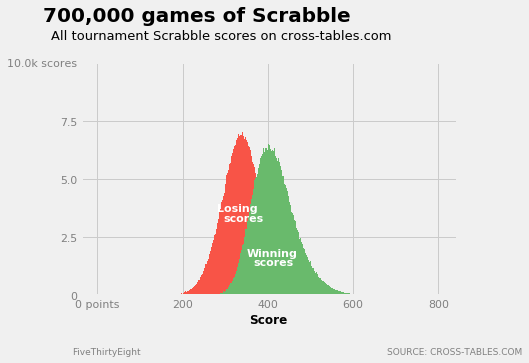

In [237]:
# Set stylesheet
plt.style.use('fivethirtyeight')
# Figure / axes syntax
fig, ax = plt.subplots()
# Plot the histogram
df['loserscore'].plot.hist(by='loserscore',bins=600,color='#F85447')
df['winnerscore'].plot.hist(by='winnerscore',bins=785,color='#69BA6C')

# Title
ax.set_title('700,000 games of Scrabble',
             loc='left',
             color='black',
             fontsize=20,
             fontweight='bold',
             x=-.1,
             y=1.15)
# Subtitle
ax.text(s='All tournament Scrabble scores on cross-tables.com',
        color='black',
        fontsize=13,
        x=-110,
        y=11000)
# X axis label
ax.set_xlabel('Score',
              fontweight='bold',
              fontsize=12)
# Y axis label
ax.set_ylabel(None)
# X axis tick labels
ax.set_xticklabels(labels=['0 points','200','400','600','800'],
                   color='gray',
                   fontsize=11)
# Set x ticks
ax.set_xticks(ticks=[0,200,400,600,800])
# Y axis tick labels
ax.set_yticklabels(labels=['0','2.5','5.0','7.5','10.0k scores'],
                   color='gray',
                   fontsize=11)
# Set y ticks
ax.set_yticks(ticks=[0,2500,5000,7500,10000])
# FiveThirtyEight Footer
ax.text(s='FiveThirtyEight',
        y=-2500,x=-60,
        c='grey',
        fontsize=9)
# Source Footer
ax.text(s='SOURCE: CROSS-TABLES.COM',
        y=-2500,x=680,
        c='grey',
        fontsize=9)
# Annotate 'Winning scores'
ax.annotate('Winning',
            xy=(350, 1700),
            weight='bold',
            color='white',
            fontsize=11)
ax.annotate('scores',
            xy=(365, 1300),
            weight='bold',
            color='white',
            fontsize=11)
# Annotate 'Losing scores'
ax.annotate('Losing',
            xy=(280, 3600),
            weight='bold',
            color='white',
            fontsize=11)
ax.annotate('scores',
            xy=(295, 3200),
            weight='bold',
            color='white',
            fontsize=11)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

Source: https://altair-viz.github.io/gallery/choropleth.html

In [248]:
import altair as alt
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties,background='gray').mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

alt.Chart(...)